En este notebook vamos a trabajar con datos de movilidad para el mes de Noviembre de 2020 completo. 
Empezamos por importar las librerias.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Los datos de movilidad disponibles en la página web del Ministerio de Transported de España están distribuidos entre los ficheros cada dia por separado. Despues de descargarlos hay que consolidar los datos de un mes completo en el fichero ".csv" ejecutando el código en la celda siguiente:

In [10]:
# la función para sacar los códigos de provincias desde los códigos de zonas más pequeñas

def recode (df, column):
    source = np.array(df[column])
    result = []
    for code in source:
        if code[0]=='0':
            result.append(int(code[1:2]))
        else:
            result.append(int(code[0:2]))
    name = 'recoded_' + column
    
    df[name] = result    


# En noviembre hay 30 días. Para otros meses puede hacer falta cambiar el rango de fechas!

a=range(1,31) 
dates=[]

for each in a:
    each =str(each)
    if len(each)==1:
        each = '0'+each
    dates.append(each)
    
path1 = './noviembre/202011' # la carpeta en la maquina local con los ficheros diarios
                             
path2 = '_maestra_1_mitma_distrito.txt' # parte común de los nombres de ficheros diarios

files = [] # aqui guardamos los nombres completos de ficheros diarios 

for date in dates:
    files.append(path1 + date + path2)

provincias=list(range(1,53))

frames = pd.DataFrame() # la tabla final con tablas diarias de datos consolidados

for file in files:
    
    data = pd.read_csv(file, sep="|", low_memory=False) # leemos un fichero
    recode(data,'origen') 
    recode(data,'destino')
    
    df = pd.DataFrame() # creamos la tabla para consolidar los datos del día
    df['periodo']=range(24) # añadimos timeline a la tabla
    
    # agrupamos los datos por provincia y hora
    for code in provincias: # para cada provincia
        
        df['fecha']=data['fecha'][0] # añadimos la columna con la fecha a la tabla
        province= data[data['recoded_origen']==code]
        data_new = province[['periodo','viajes_km']] # seleccionamos los datos para guardar en la tabla
        grouped = data_new.groupby(by=["periodo"]).sum() # consolidamos los datos de movilidad por hora
        df[code]=grouped['viajes_km'] # añadimos datos consolidados a la tabla
    
    frames = pd.concat([frames, df]) # añadimos la tabla del día a la tabla final
    
frames.to_csv('./noviembre/noviembre.csv', index=False) # guardamos la tabla final como un fichero ".csv"

La tabla con datos de Noviembre:

In [11]:
noviembre = pd.read_csv('./noviembre/noviembre.csv')

noviembre

,periodo,fecha,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,52
0,0,20201101,44009.233,66707.543,361994.944,149279.415,27741.731,155114.100,207762.892,696391.452,...,106642.008,27678.777,177573.555,482561.611,68242.283,113818.941,49181.597,133223.287,8397.566,6416.381
1,1,20201101,21946.849,51087.419,244558.302,115247.041,22200.664,104260.251,144920.987,550648.735,...,96631.094,18393.460,125506.316,331420.503,57111.487,79985.089,30491.251,103527.734,6297.690,5080.921
2,2,20201101,27683.553,37021.849,199920.915,99688.365,26861.659,86628.748,132100.399,463969.333,...,77013.906,10907.111,107668.036,299476.231,51941.894,73594.656,26022.349,108130.484,5086.132,4097.042
3,3,20201101,18411.288,35739.796,195333.355,116754.316,24939.622,73980.815,150316.996,446483.385,...,89518.161,11175.811,103717.138,293120.115,52317.501,66219.218,28030.817,100877.760,4573.465,3195.614
4,4,20201101,21783.837,46900.346,222614.501,129583.194,14789.286,80979.431,150228.550,576288.406,...,98815.542,20096.121,134558.367,366173.513,54173.681,87017.482,35273.868,117673.175,4763.171,3593.594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19,20201130,252465.714,417537.970,1767450.360,695761.121,128830.008,787578.023,1027230.916,4827388.487,...,698631.159,148649.382,859437.669,2430004.391,463490.692,771027.986,315518.547,923205.006,33080.184,22835.211
716,20,20201130,222476.879,326165.573,1367525.670,563738.242,103937.248,588347.741,770921.814,4203130.064,...,553674.889,81031.556,662009.953,2013075.573,379968.970,658711.657,199307.355,820652.529,28087.800,21687.251
717,21,20201130,203834.037,204106.849,986590.410,524365.652,70236.439,471423.977,602944.862,3204384.373,...,424448.507,79939.069,550954.411,1576266.110,316424.010,515466.144,157269.365,639736.843,25297.148,16195.649
718,22,20201130,122005.951,140973.214,718019.963,379286.587,49661.961,283632.955,376918.584,1865581.042,...,258371.970,54115.190,397864.247,1113525.857,173028.736,255780.626,112884.229,507229.307,14145.208,9296.689


Ahora tenemos una tabla con 720 observaciones (30 dias x 24 horas) para cada de 52 provincias, Ceuta y Melilla incluidas. La estructura de la tabla nos permite crear las series temporales para provincia cualquiera con facilidad.

Vamos a crear una serie temporal con datos de noviembre para movilidad en provincia de Alicante. El código de Alicante es 3.

In [13]:
ts_alic_nov = noviembre['3']
ts_alic_nov

0       361994.944
1       244558.302
2       199920.915
3       195333.355
4       222614.501
          ...     
715    1767450.360
716    1367525.670
717     986590.410
718     718019.963
719     356727.990
Name: 3, Length: 720, dtype: float64

Visualizamos la serie:

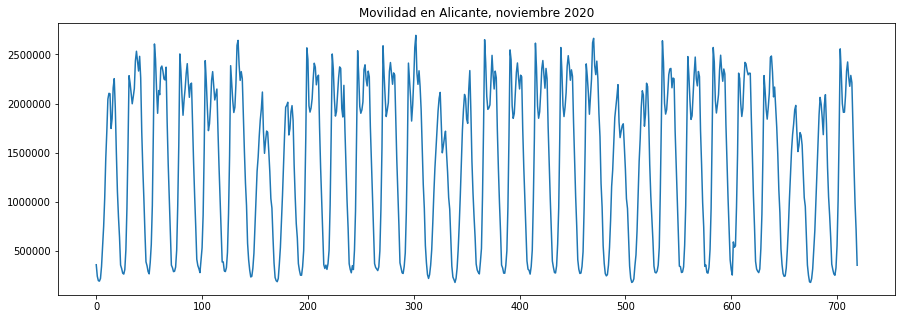

In [14]:
plotsize=(15,5)
ts_alic_nov.plot(figsize=plotsize, title='Movilidad en Alicante, noviembre 2020');

Teniendo en cuenta las carácteristicas principales de las series temporales estacionarias (el valor medio y la variación no dependen del lapso de tiempo, los datos no tienen estacionalidad) podemos concluir que la serie muestra el carácter NO ESTACIONARIO, cómo mínimo, por tener la estacionalidad de 24 horas.

Descomponemos la serie utilizando la librería 'statsmodels' y visualizamos los componentes.

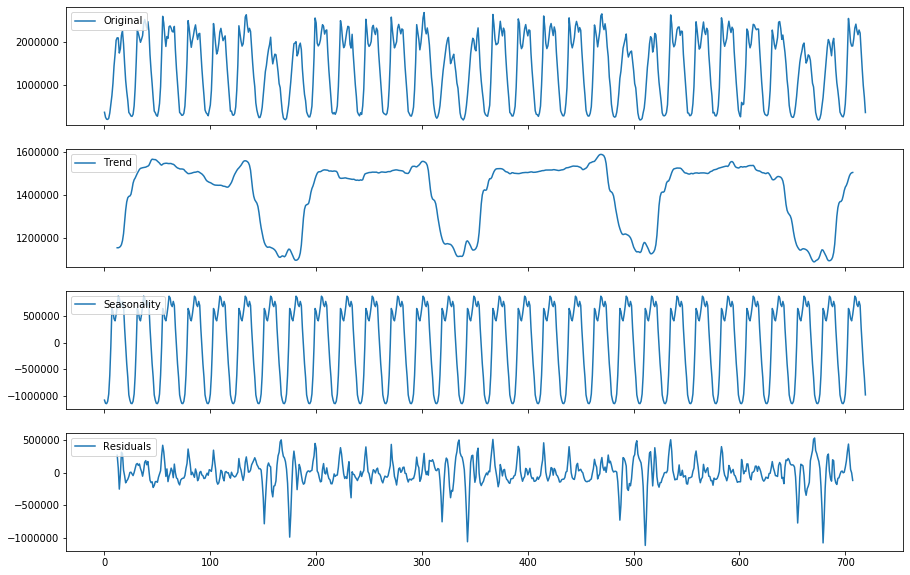

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=ts_alic_nov, model='additive', period=24)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(ts_alic_nov, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

Al descomponer la serie  además del ciclo diario podemos ver otro ciclo semanal en el gráfico de tendencia("Trend").

Para aplicar los metodos estadísticos de modelado, necesitamos que la serie sea estacionaria. Para comprobar el carácter de la serie vamos ponerla a prueba con "The Augmented Dickey-Fuller Test". Definimos una función para presentar los resultados de la prueba:

In [18]:
from statsmodels.tsa.stattools import adfuller

def adf_test(serie,title=''):
    
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(serie.dropna(),autolag='AIC') # .dropna() para manejar los datos en el caso de diferenciarlos
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() para quitar la linea "dtype: float64"
    
    if result[1] <= 0.05:
        print("La serie es estacionaria")
    else:
         print("La serie es NO estacionaria")

Y ahora ponemos la serie original a la prueba:

In [19]:
adf_test(ts_alic_nov, "Movilidad en Alicante, noviembre 2020")

Augmented Dickey-Fuller Test: Movilidad en Alicante, noviembre 2020
ADF test statistic       -3.797711
p-value                   0.002931
# lags used              20.000000
# observations          699.000000
critical value (1%)      -3.439740
critical value (5%)      -2.865684
critical value (10%)     -2.568977
La serie es estacionaria


Aunque los datos muestran estacionalidad, la prueba nos dice que la serie es estacionaria.

Vamos a comparar las estadisticas resultantes de la prueba de serie original con las estadisticas para los residuos de la serie descompuesta.

In [20]:
adf_test(estimated_residual, "Residuos de la serie descompuesta")

Augmented Dickey-Fuller Test: Residuos de la serie descompuesta
ADF test statistic     -1.111266e+01
p-value                 3.627439e-20
# lags used             1.900000e+01
# observations          6.760000e+02
critical value (1%)    -3.440061e+00
critical value (5%)    -2.865825e+00
critical value (10%)   -2.569052e+00
La serie es estacionaria


Al suprimir la estacionalidad (con frecuencia de 24 horas) y tendencia (de 7 dias) de los datos originales hemos obtenido una serie mucho más estacionaria con p-value alrededor del cero, aunque tampóco sea un "ruido blanco".

Para poder volver a trabajar con la serie de noviembre de Alicante vamos a guardarla cómo un archivo ".csv"

In [21]:
ts_alic_nov.to_csv('./noviembre/3_noviembre.csv', index=False)